# Enoncé

- Rajoute un modèle d'apprentissage basé sur les polynôme trigonométriques.
C'est à dire passer des fonctions
$$
P(x)=\sum_{k=0}^d c_k x^k
$$
aux fonctions
$$
T(x)= c_0 + \sum_{k=1}^d c_k \cos\left(2k\pi \frac{x-a}{b-a}\right) + \sum_{k=1}^d c_{d+k} \sin\left(2k\pi \frac{x-a}{b-a}\right)
$$
où la cible est $f:[a,b] \mapsto \mathbb{R}$.
- Coder une fonction `train_test_split` permettant de découper un échantillon en deux: une partie pour l'entrainement, une partie pour détecter un éventuel surapprentissage.
- Coder une fonction `cross_validation` qui permet de sélectionner un meilleur modèle à partir de la partie entrainement de l'échantillon.

In [1]:
import lib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
cible = lib.Cible(
    fonction=lambda x: np.exp(1. / (2. + np.sin(5 * x) * np.cos(20 * x))),
    gauche=0.,
    droite=1.,
)

In [4]:
echantillon = lib.genere_echantillon(
    cible=cible, 
    nb_points=50, 
    choix_points=lib.ChoixPoints.uniforme, 
    choix_bruit=lib.ChoixBruit.normale, 
    amplitude=0.1
)

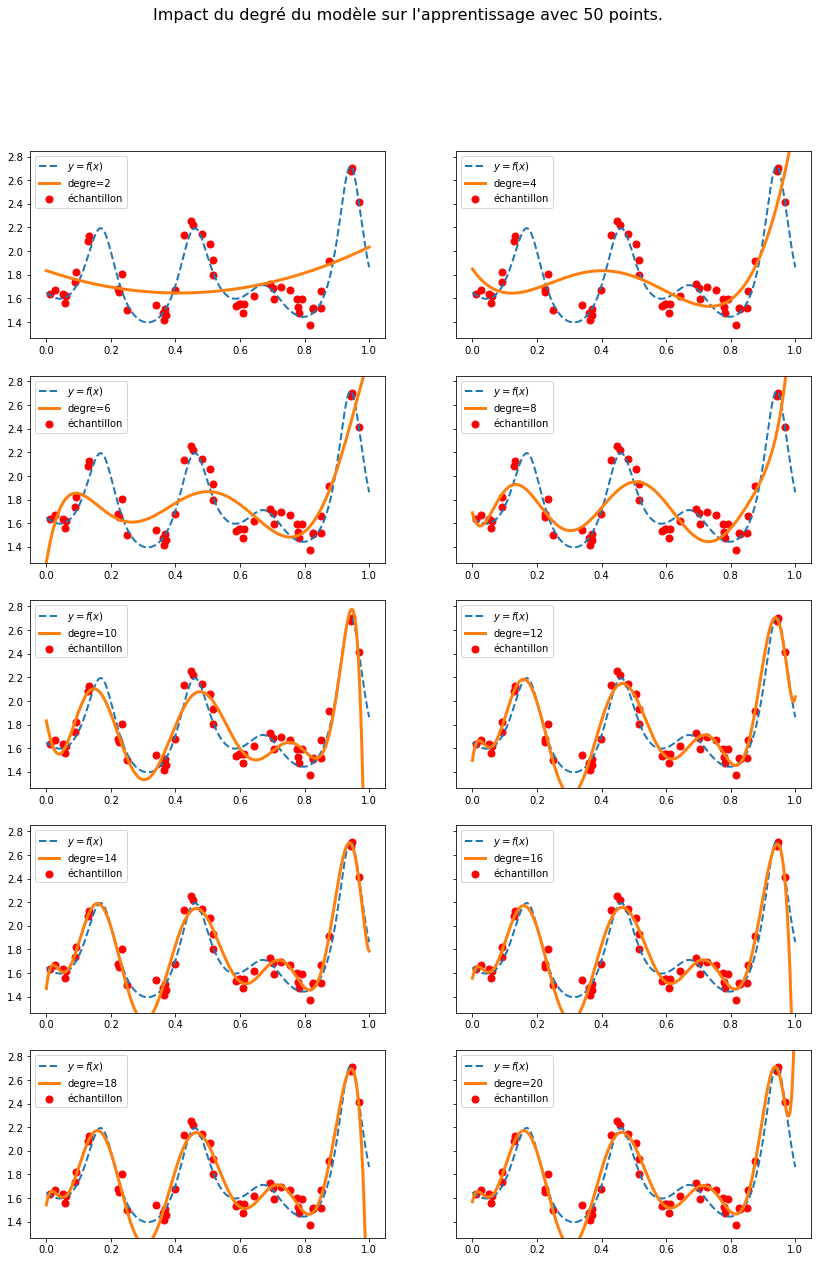

In [5]:
degres = [2 * d for d in range(1, 11)]
fig, reps = plt.subplots(nrows=5, ncols=2, sharey=True, figsize=(14, 20))

fig.suptitle(
    "Impact du degré du modèle sur l'apprentissage avec " 
    f"{len(echantillon.abcisses)} points.",
    fontsize=16
)
for degre, rep in zip(degres, reps.flatten()):
    cible.affichage(rep)
    echantillon.affichage(rep)
    modele = lib.ModelePolynomial(degre)
    modele.entraine(echantillon)
    modele.affichage(cible=cible, repere=rep)
    rep.set_ylim(cible.min, cible.max)
    rep.legend()

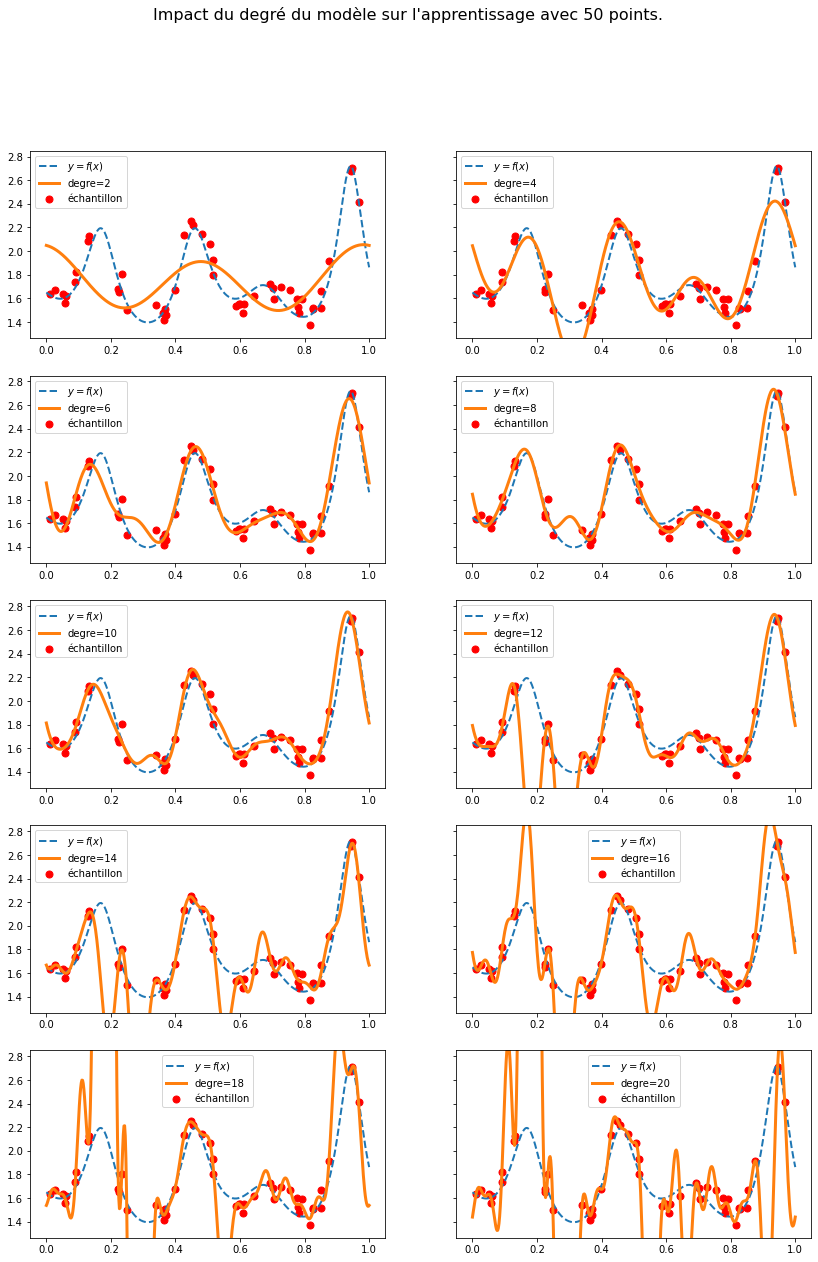

In [6]:
degres = [2 * d for d in range(1, 11)]
fig, reps = plt.subplots(nrows=5, ncols=2, sharey=True, figsize=(14, 20))

fig.suptitle(
    "Impact du degré du modèle sur l'apprentissage avec " 
    f"{len(echantillon.abcisses)} points.",
    fontsize=16
)
for degre, rep in zip(degres, reps.flatten()):
    cible.affichage(rep)
    echantillon.affichage(rep)
    modele = lib.ModeleTrigonometrique(
        degre=degre, 
        gauche=cible.gauche, 
        droite=cible.droite
    )
    modele.entraine(echantillon)
    modele.affichage(cible=cible, repere=rep)
    rep.set_ylim(cible.min, cible.max)
    rep.legend()

In [15]:
def etude_degres(choix_points, choix_bruit, mod):
    echantillon = lib.genere_echantillon(
        cible=cible, 
        nb_points=50, 
        choix_points=choix_points, 
        choix_bruit=choix_bruit, 
        amplitude=0.1
    )
    train, test = lib.train_test_split(
        echantillon, 
        proba_train=0.7,
    )
    degres = [d for d in range(1, 30)]
    erreurs_objective = list()
    erreurs_train = list()
    erreurs_test = list()
    for degre in degres:
        modele = mod(degre)
        modele.entraine(train)
        erreurs_objective.append(lib.erreur_objective(modele, cible))
        erreurs_train.append(lib.erreur_empirique(modele, train))
        erreurs_test.append(lib.erreur_empirique(modele, test))
    return degres, erreurs_objective, erreurs_train, erreurs_test
    

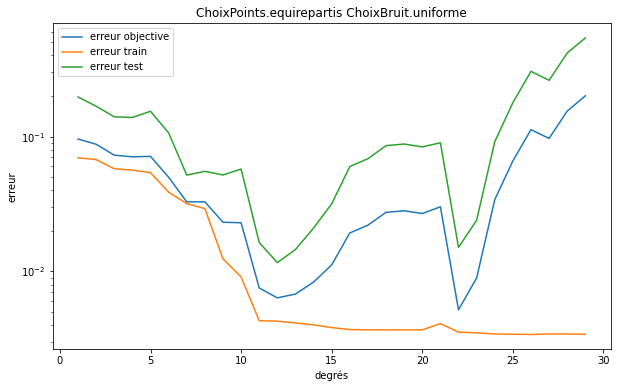

In [17]:
fig, rep = plt.subplots(figsize=(10, 6))
choix_bruit = lib.ChoixBruit.uniforme
choix_points = lib.ChoixPoints.equirepartis
degres, erreurs_objective, erreurs_train, erreurs_test = etude_degres(
    choix_bruit=choix_bruit, 
    choix_points=choix_points,
    mod=lib.ModelePolynomial,
)
rep.set_title(f"{choix_points} {choix_bruit}")
rep.set_xlabel("degrés")
rep.set_ylabel("erreur")
rep.semilogy(degres, erreurs_objective, label="erreur objective")
rep.semilogy(degres, erreurs_train, label="erreur train")
rep.semilogy(degres, erreurs_test, label="erreur test")
rep.legend()

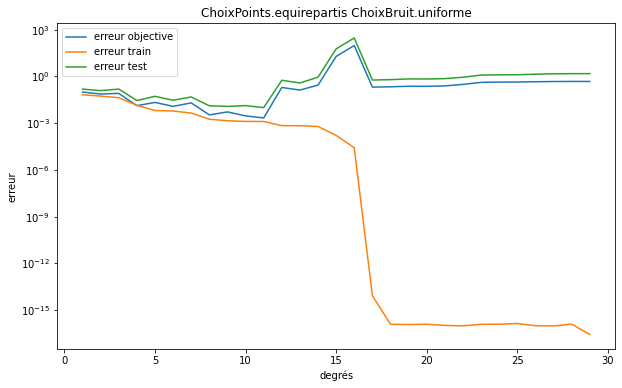

In [19]:
fig, rep = plt.subplots(figsize=(10, 6))
choix_bruit = lib.ChoixBruit.uniforme
choix_points = lib.ChoixPoints.equirepartis
degres, erreurs_objective, erreurs_train, erreurs_test = etude_degres(
    choix_bruit=choix_bruit, 
    choix_points=choix_points,
    mod=lambda deg: lib.ModeleTrigonometrique(deg, 0., 1.),
)
rep.set_title(f"{choix_points} {choix_bruit}")
rep.set_xlabel("degrés")
rep.set_ylabel("erreur")
rep.semilogy(degres, erreurs_objective, label="erreur objective")
rep.semilogy(degres, erreurs_train, label="erreur train")
rep.semilogy(degres, erreurs_test, label="erreur test")
rep.legend()